In [5]:
from mfmri.mfmri_core import BaseMFractalMRI

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
bmfmri = BaseMFractalMRI()
bmfmri.load_scan('test-data/scanfile.nii.gz')
bmfmri.slice_scan('z')
bmfmri.slice_to_sfc()

In [4]:
bmfmri.calc_mfdfa()

/home/grela/miniconda3/envs/peanoenv/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/grela/miniconda3/envs/peanoenv/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/grela/miniconda3/envs/peanoenv/lib/python3.9/site-packages/MFDFA/MFDFA.py:249: RuntimeWarning: divide by zero encountered in float_power
  np.mean(np.float_power(F, q / 2), axis=1),


## short/small scales

In [12]:
hursts = None
hursts_errors = None
max_scales = np.array(list(range(3,21)))
for max_scale in max_scales:
    # print(max_scale)
    bmfmri.calc_ghurst(min_scale_ix=None,max_scale_ix=max_scale,scale_preset='small_scales')
    ghs = np.expand_dims(bmfmri.ghs,0)
    ghs_res = np.expand_dims(bmfmri.ghs_res,0)
    hursts = ghs if hursts is None else np.vstack([hursts,ghs])
    hursts_errors = ghs_res if hursts_errors is None else np.vstack([hursts_errors,ghs_res])



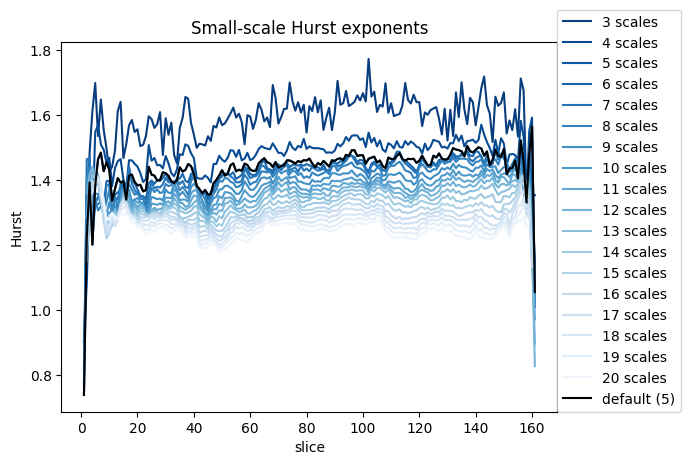

In [32]:
sns.set_palette(sns.palettes.color_palette('Blues_r',len(max_scales)));
for max_scale,x in zip(max_scales,hursts[:,:,29]):
    plt.plot(x,label=f'{max_scale} scales');

plt.plot(hursts[np.argwhere(max_scales==5),:,29],'k',label='default (5)')
plt.title('Small-scale Hurst exponents')
plt.ylabel('Hurst')
plt.xlabel('slice')
plt.legend(loc=(1,0));

## long/large scales

In [52]:
hursts = None
hursts_errors = None
min_scales = np.array(list(range(10,27)))
for min_scale in min_scales:
    # print(max_scale)
    bmfmri.calc_ghurst(min_scale_ix=min_scale,max_scale_ix=None,scale_preset='large_scales')
    ghs = np.expand_dims(bmfmri.ghs,0)
    ghs_res = np.expand_dims(bmfmri.ghs_res,0)
    hursts = ghs if hursts is None else np.vstack([hursts,ghs])
    hursts_errors = ghs_res if hursts_errors is None else np.vstack([hursts_errors,ghs_res])



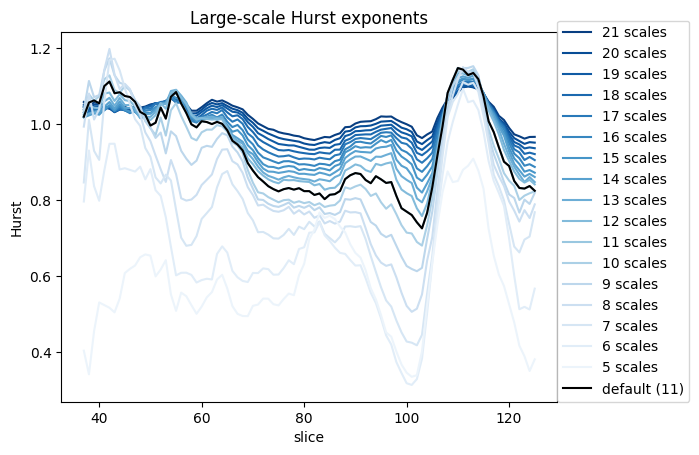

In [53]:
n_scales = bmfmri.scales.shape[1]

sns.set_palette(sns.palettes.color_palette('Blues_r',len(min_scales)));
for min_scale,x in zip(min_scales,hursts[:,:,29]):
    plt.plot(x,label=f'{n_scales-min_scale} scales');

plt.plot(hursts[np.argwhere(min_scales==20).item(),:,29],'k',label=f'default ({n_scales-20})')
plt.title('Large-scale Hurst exponents')
plt.ylabel('Hurst')
plt.xlabel('slice')
plt.legend(loc=(1,0));